# 💊 Pharmaceutical Data Analysis India

![img](https://www.cironpharma.com/blog/wp-content/uploads/2020/02/Indian-Pharmaceutical-Industry.jpg)

# TABLE OF CONTENTS
1. [About the Dataset](#💊-About-the-Dataset)
2. [Research Questions](#💊Research-Questions)
3. [Importing Libraries](#💊-Importing-Libraries)
4. [Importing the Dataset](#💊-Importing-the-Dataset)
5. [Descriptive Data Analysis and Data Cleaning](#💊-Descriptive-Data-Analysis-and-Data-Cleaning)
6. [Exploratory Data Analysis & Data Visualization](#💊-Exploratory-Data-Analysis-&-Data-Visualization)
7. [Summary and Conclusion](#💊-Summary-and-Conclusion)

# 💊 About the Dataset

The file has data which contains all possible medicines that we were able to find out during our research on finding out medicine's details such as compositions of medicine, type of medicines, there market availability, pricing and many other things.

The data consist of medicines from various pharmaceutical companies including:
1) Sun Pharmaceutical Industries
2) Torrent Pharma
3) Glenmark Pharma Limited
4) Emcure Pharmaceuticals
5) Cipla Limited
6) Zydus Lifesciences Limited (formerly Cadila Healthcare)
7) Abbott India Ltd.
8) Alkem Laboratories
9) Lupin Limited
10) Piramal Enterprises Limited
and 7638 other pharmaceutical companies.

*Prices of medicines are reported / recorded as of November,2022.

*is_discontinued column defines Availability of medicines that is reported as of November,2022.

# 💊Research Questions

1. Which manufacturer has the most products?
2. What is the average price of the top manufacturers' products?
3. How many products have been discontinued?
4. What is the range of prices for top manufacturer?
5. What is the relationship between pack size and price?
6. What is the distribution of pack sizes of the top manufacturers?
7. Are there any specific compositions that are more prevalent in certain types of products or by certain manufacturers? 
8. Are discontinued products more common in certain manufacturers?

# 💊 Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# 💊 Importing the Dataset

In [2]:
df = pd.read_csv(r'C:\Users\MEGAMIND\Downloads\AZ medicine\A_Z_medicines_dataset_of_India.csv')

# 💊 Descriptive Data Analysis and Data Cleaning

In [3]:
df.shape

(253973, 9)

In [4]:
df.head()

,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
0,1,Augmentin 625 Duo Tablet,223.42,False,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,2,Azithral 500 Tablet,132.36,False,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN
2,3,Ascoril LS Syrup,118.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
3,4,Allegra 120mg Tablet,218.81,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN
4,5,Avil 25 Tablet,10.96,False,Sanofi India Ltd,allopathy,strip of 15 tablets,Pheniramine (25mg),NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253973 entries, 0 to 253972
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  253973 non-null  int64  
 1   name                253973 non-null  object 
 2   price(₹)            253973 non-null  float64
 3   Is_discontinued     253973 non-null  bool   
 4   manufacturer_name   253973 non-null  object 
 5   type                253973 non-null  object 
 6   pack_size_label     253973 non-null  object 
 7   short_composition1  253973 non-null  object 
 8   short_composition2  112171 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 15.7+ MB


In [6]:
df.describe()

,id,price(₹)
count,253973.000000,253973.000000
mean,126987.000000,270.530844
std,73315.834296,3029.584134
min,1.000000,0.000000
25%,63494.000000,48.000000
50%,126987.000000,79.000000
75%,190480.000000,140.000000
max,253973.000000,436000.000000


In [7]:
df.describe(include='object')

,name,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
count,253973,253973,253973,253973,253973,112171
unique,249398,7648,1,1929,8523,2980
top,NS 0.9% Infusion,Sun Pharmaceutical Industries Ltd,allopathy,strip of 10 tablets,Aceclofenac (100mg),Rabeprazole (20mg)
freq,12,2986,253973,116540,6930,4743


In [8]:
df.isna().sum()

id                         0
name                       0
price(₹)                   0
Is_discontinued            0
manufacturer_name          0
type                       0
pack_size_label            0
short_composition1         0
short_composition2    141802
dtype: int64

In [9]:
# Dropping the `short_composition2` column
df.drop('short_composition2', axis=1, inplace=True)

In [10]:
# Renaming the price column
df = df.rename(columns={'price(₹)':'price', 'Is_discontinued':'is_discontinued',
                       'manufacturer_name':'manufacturer',
                       'short_composition1': 'composition'})
df.columns

Index(['id', 'name', 'price', 'is_discontinued', 'manufacturer', 'type',
       'pack_size_label', 'composition'],
      dtype='object')

## 💊 Closely looking at each column

In [11]:
for col in df.columns:
    print('\033[1m' + col + '\033[0m')
    print(df[col].value_counts())
    print('-'*60)

id
1         1
169322    1
169309    1
169310    1
169311    1
         ..
84663     1
84664     1
84665     1
84666     1
253973    1
Name: id, Length: 253973, dtype: int64
------------------------------------------------------------
name
NS 0.9% Infusion               12
Ringer Lactate Infusion         7
Lulibet Cream                   5
Luligee Cream                   5
Azilife 500mg Tablet            5
                               ..
Flotrust Eye Drop               1
Funspor 150 Tablet              1
Folcin 2 Injection              1
Fos-Aprepitant 125mg Tablet     1
Zyvocol 1% Dusting Powder       1
Name: name, Length: 249398, dtype: int64
------------------------------------------------------------
price
65.00      3966
75.00      3744
45.00      3524
55.00      3423
60.00      3238
           ... 
206.66        1
62.62         1
2586.48       1
43.28         1
34.69         1
Name: price, Length: 20664, dtype: int64
------------------------------------------------------------


In [12]:
# Replacing the values in the `is_discontinued` column
df['is_discontinued'] = df['is_discontinued'].astype(int)
df['is_discontinued'].value_counts()

0    246068
1      7905
Name: is_discontinued, dtype: int64

In [13]:
# Checking for duplicated values
df.duplicated().any()

False

# 💊 Exploratory Data Analysis & Data Visualization

1. Which manufacturer has the most products?

In [14]:
top_manu = df['manufacturer'].value_counts()[:10]
top_manu

Sun Pharmaceutical Industries Ltd    2986
Cipla Ltd                            2467
Intas Pharmaceuticals Ltd            2302
Torrent Pharmaceuticals Ltd          2027
Alkem Laboratories Ltd               1809
Abbott                               1777
Zydus Cadila                         1768
Lupin Ltd                            1735
Micro Labs Ltd                       1305
Mankind Pharma Ltd                   1297
Name: manufacturer, dtype: int64

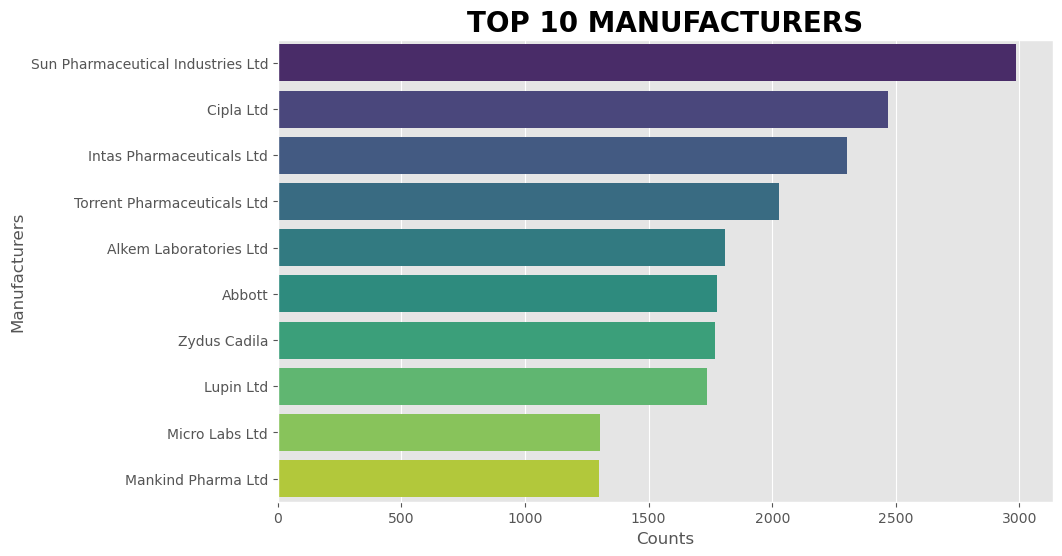

In [15]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y=top_manu.index, x=top_manu.values, palette='viridis')
ax.set_title('TOP 10 MANUFACTURERS', fontweight='bold', size=20)
ax.set_ylabel('Manufacturers')
ax.set_xlabel('Counts')
plt.show()

2. What is the average price of the top manufacturers' products?

In [16]:
top_manu = df['manufacturer'].value_counts().nlargest(10)
top_manu

Sun Pharmaceutical Industries Ltd    2986
Cipla Ltd                            2467
Intas Pharmaceuticals Ltd            2302
Torrent Pharmaceuticals Ltd          2027
Alkem Laboratories Ltd               1809
Abbott                               1777
Zydus Cadila                         1768
Lupin Ltd                            1735
Micro Labs Ltd                       1305
Mankind Pharma Ltd                   1297
Name: manufacturer, dtype: int64

In [17]:
# Filter the original DataFrame to include only the top manufacturers
df_top_manu = df[df['manufacturer'].isin(top_manu.index)]

# Calculate the average price for each manufacturer
avg_prices = df_top_manu.groupby('manufacturer')['price'].mean()
avg_prices

manufacturer
Abbott                               465.935808
Alkem Laboratories Ltd               684.019491
Cipla Ltd                            702.815902
Intas Pharmaceuticals Ltd            866.344127
Lupin Ltd                            505.637914
Mankind Pharma Ltd                   144.707170
Micro Labs Ltd                       150.304146
Sun Pharmaceutical Industries Ltd    506.453449
Torrent Pharmaceuticals Ltd          357.037642
Zydus Cadila                         938.165074
Name: price, dtype: float64

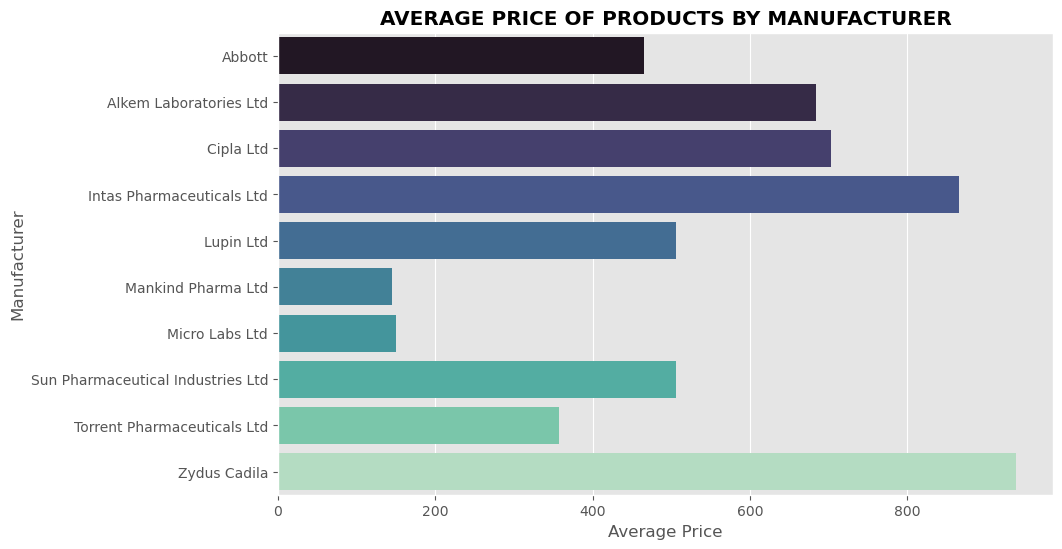

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_prices.values, y=avg_prices.index, palette='mako')
plt.title('AVERAGE PRICE OF PRODUCTS BY MANUFACTURER', fontweight='bold')
plt.xlabel('Average Price')
plt.ylabel('Manufacturer')
plt.show()

3. How many products have been discontinued?

In [19]:
discontinued = df['is_discontinued'].value_counts()
discontinued

0    246068
1      7905
Name: is_discontinued, dtype: int64

In [20]:
discontinued = df['is_discontinued'].value_counts(normalize=True)
discontinued

0    0.968875
1    0.031125
Name: is_discontinued, dtype: float64

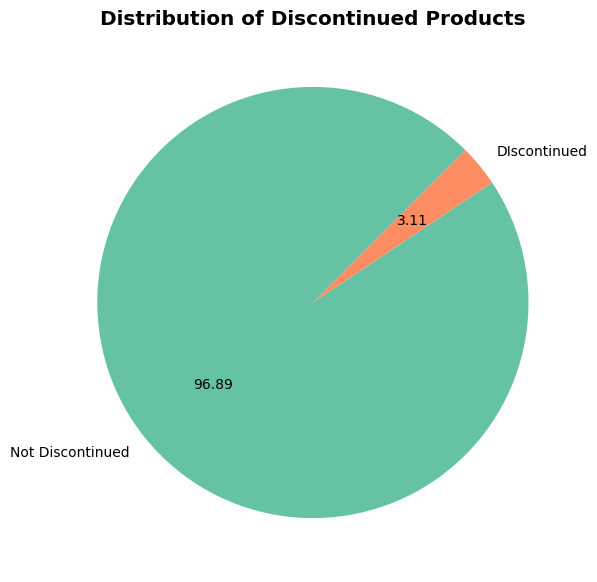

In [21]:
colors = sns.color_palette('Set2')
plt.figure(figsize=(7,7))
labels = ['Not Discontinued', 'DIscontinued']
plt.title('Distribution of Discontinued Products', fontweight='bold')
plt.pie(discontinued, autopct='%.2f', startangle=45, colors=colors, labels=labels)
plt.show()

4. What is the range of price for top manufacturers?

In [22]:
top_manu = df['manufacturer'].value_counts().nlargest(10).index
df_top_manu = df[df['manufacturer'].isin(top_manu)]
price_range = df_top_manu.groupby('manufacturer')['price'].agg(['min','max'])
price_range

,min,max
manufacturer,,
Abbott,1.63,53888.0
Alkem Laboratories Ltd,2.05,59400.0
Cipla Ltd,1.25,119500.0
Intas Pharmaceuticals Ltd,2.12,99000.0
Lupin Ltd,2.15,55350.0
Mankind Pharma Ltd,3.08,6000.0
Micro Labs Ltd,1.39,4299.0
Sun Pharmaceutical Industries Ltd,1.25,37000.0
Torrent Pharmaceuticals Ltd,2.93,39990.0


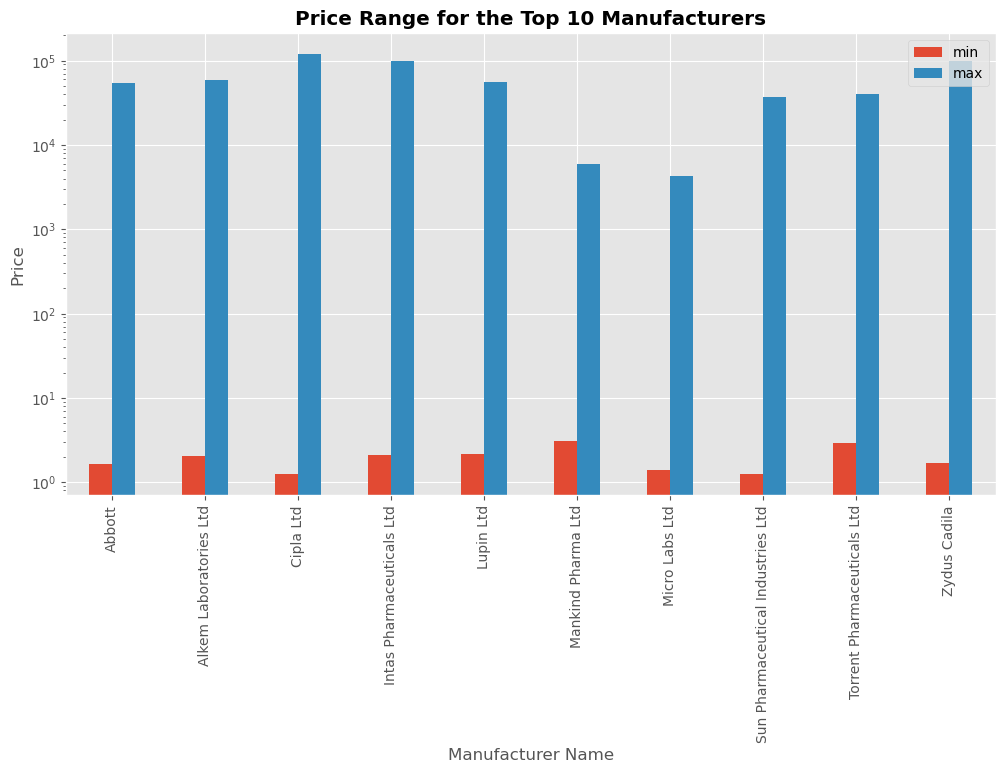

In [23]:
price_range.reset_index(inplace=True)

# Creating a dual barplot
fig, ax = plt.subplots(figsize=(12,6))
price_range.plot(x='manufacturer', y=['min', 'max'], kind='bar', ax=ax)
plt.xlabel('Manufacturer Name')
plt.ylabel('Price')
plt.title('Price Range for the Top 10 Manufacturers', fontweight='bold')
plt.xticks(rotation=90)
plt.yscale('log') # Setting the y-axis to log scale to display the min values
plt.show()

5. What is the relationship between pack size and price?

In [24]:
# Creating a new column for pack size
df['pack_size'] = df['pack_size_label'].str.extract('(\d+)', expand=False).astype(float)
df['pack_size'].head()

0     10.0
1      5.0
2    100.0
3     10.0
4     15.0
Name: pack_size, dtype: float64

In [25]:
df['pack_type'] = df['pack_size_label'].str.extract('(\w+)$', expand=False)
df['pack_type']

0            tablets
1            tablets
2              Syrup
3            tablets
4            tablets
             ...    
253968    Suspension
253969       tablets
253970       tablets
253971     Injection
253972        Powder
Name: pack_type, Length: 253973, dtype: object

In [26]:
df.head()

,id,name,price,is_discontinued,manufacturer,type,pack_size_label,composition,pack_size,pack_type
0,1,Augmentin 625 Duo Tablet,223.42,0,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),10.0,tablets
1,2,Azithral 500 Tablet,132.36,0,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),5.0,tablets
2,3,Ascoril LS Syrup,118.00,0,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),100.0,Syrup
3,4,Allegra 120mg Tablet,218.81,0,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),10.0,tablets
4,5,Avil 25 Tablet,10.96,0,Sanofi India Ltd,allopathy,strip of 15 tablets,Pheniramine (25mg),15.0,tablets


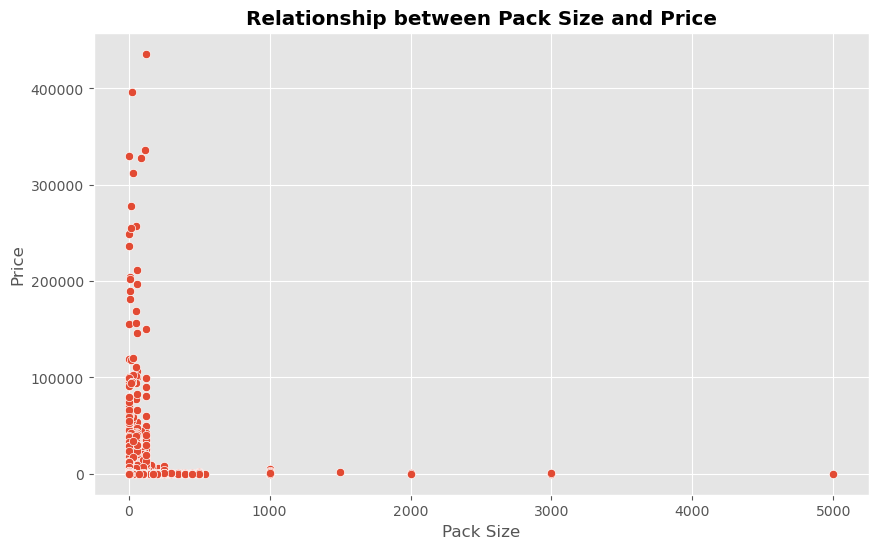

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pack_size', y='price', data=df)
plt.title('Relationship between Pack Size and Price', fontweight='bold')
plt.xlabel('Pack Size')
plt.ylabel('Price')
plt.show()

6. What is the distribution of pack sizes of the top manufacturers?

In [28]:
top_manufacturers = df['manufacturer'].value_counts().index[:10]  # Get top 10 manufacturers
df_top = df[df['manufacturer'].isin(top_manufacturers)]  # Filter DataFrame for top manufacturersbdf_top

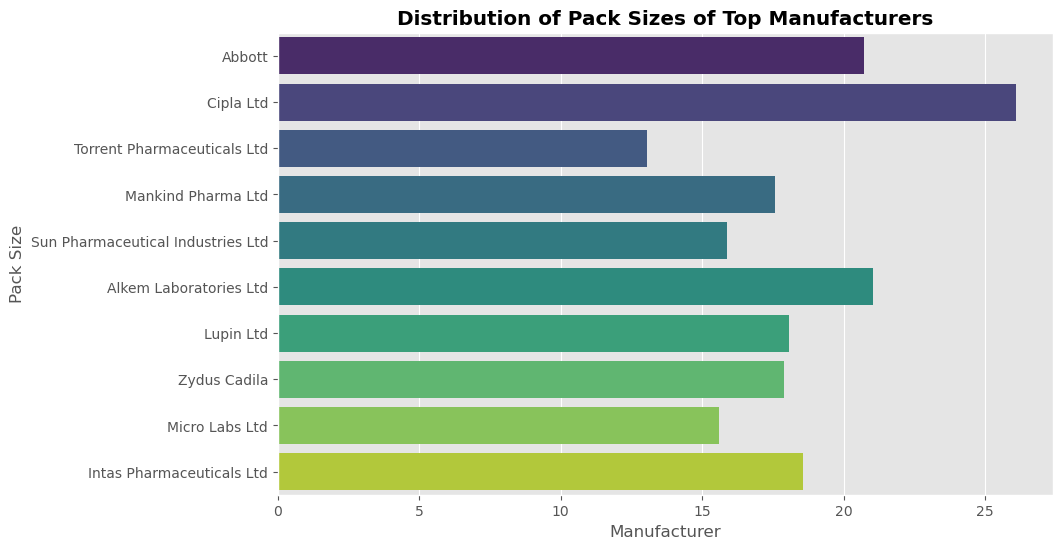

In [29]:
# Plot the bar graph
plt.figure(figsize=(10,6))
sns.barplot(y='manufacturer', x='pack_size', data=df_top, ci=None, palette='viridis')
plt.title('Distribution of Pack Sizes of Top Manufacturers', fontweight='bold')
plt.xlabel('Manufacturer')
plt.ylabel('Pack Size')
plt.show()

7. Are there any specific compositions that are more prevalent in certain types of products or by certain manufacturers?

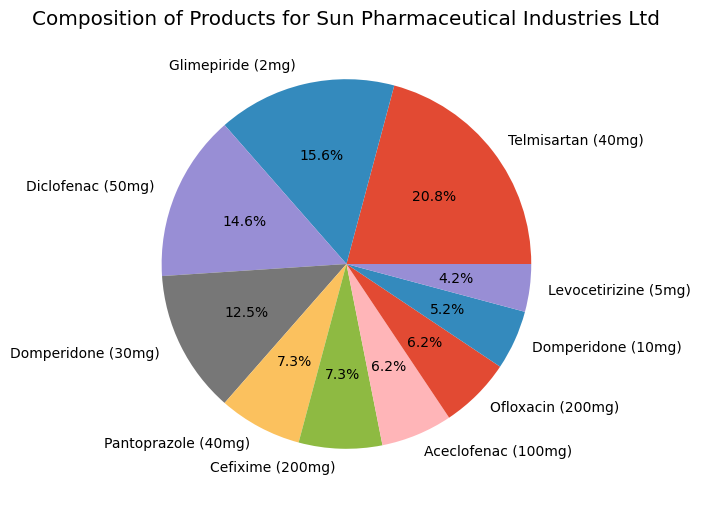

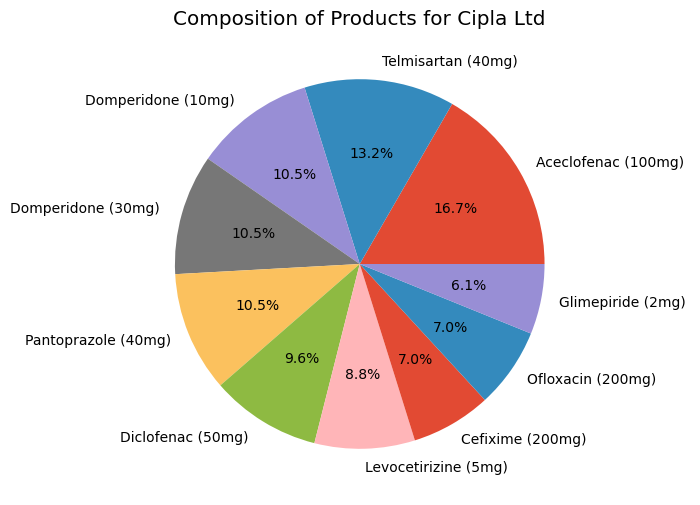

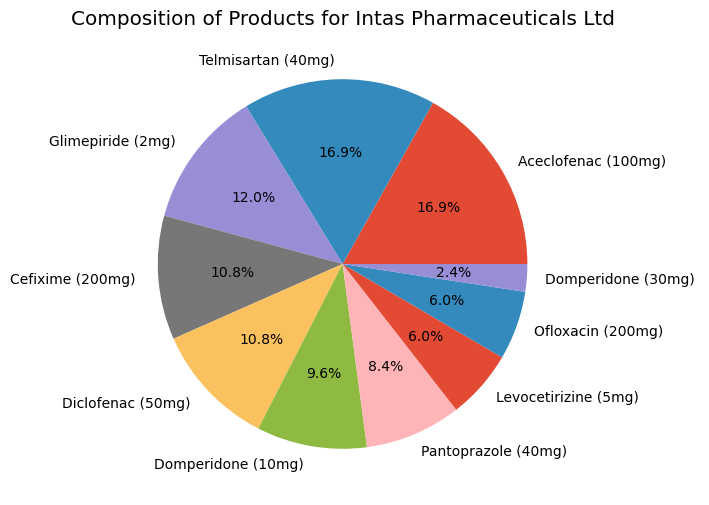

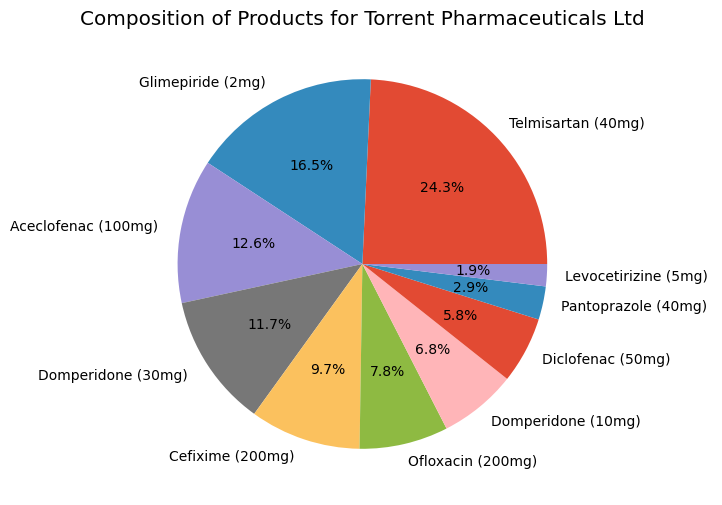

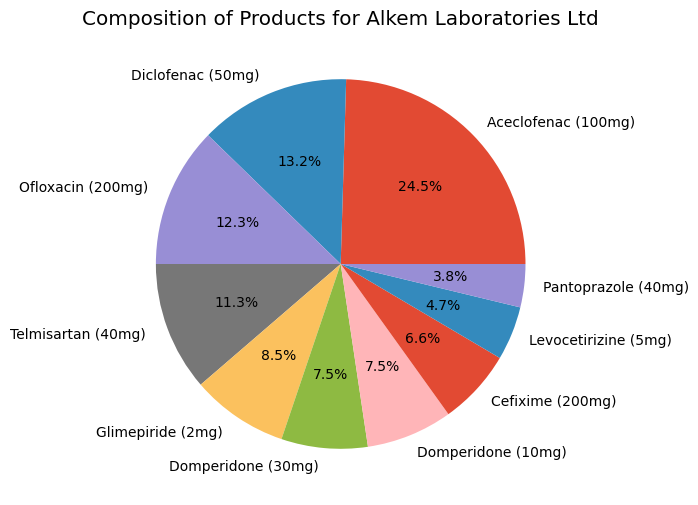

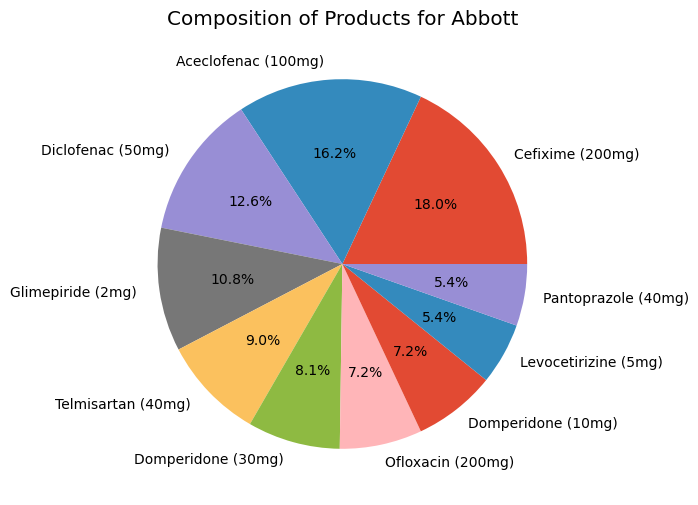

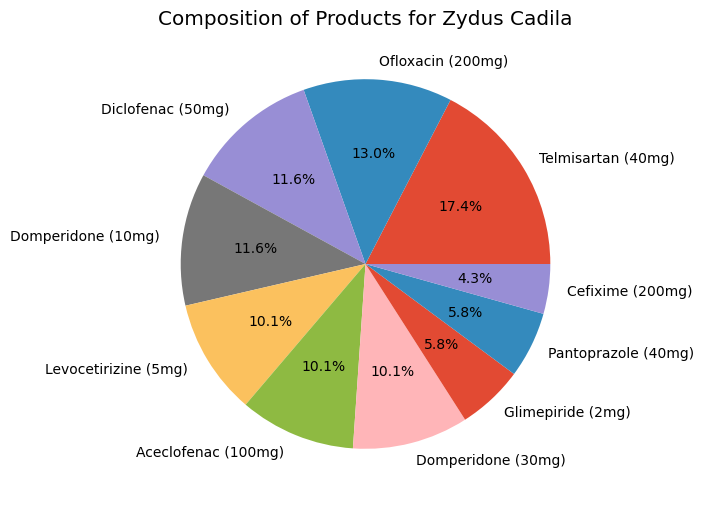

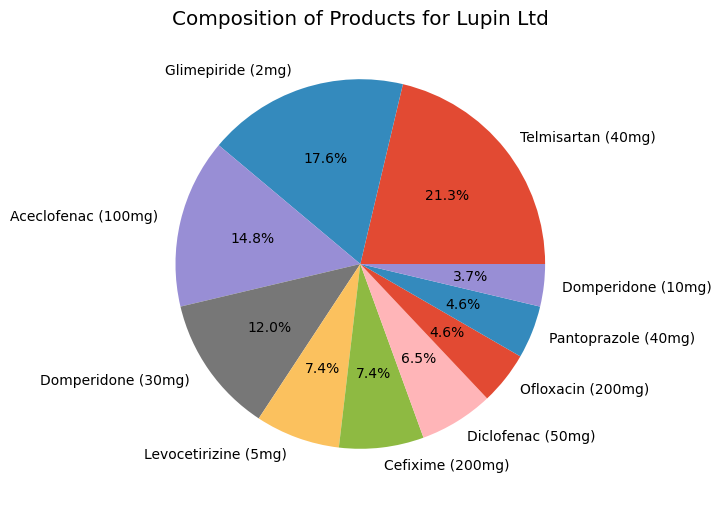

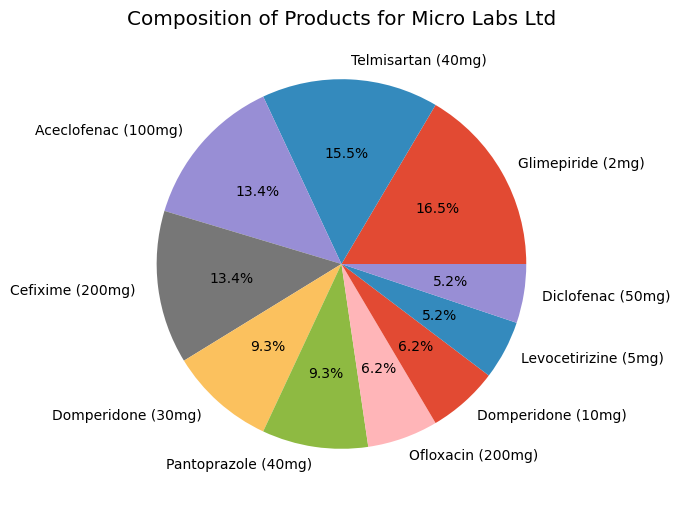

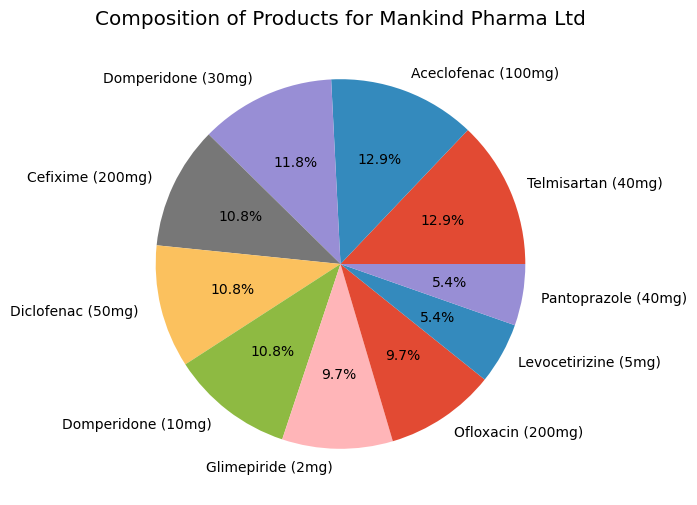

In [30]:
# Find the top 10 manufacturers and compositions
top_manufacturers = df['manufacturer'].value_counts().index[:10]
top_compositions = df['composition'].value_counts().index[:10]

# Filter data for the top 10 manufacturers and compositions
df_top = df[df['manufacturer'].isin(top_manufacturers) & df['composition'].isin(top_compositions)]

for manufacturer in top_manufacturers:
    # Filter data for the manufacturer
    df_manufacturer = df_top[df_top['manufacturer'] == manufacturer]
    
    # Get composition counts
    composition_counts = df_manufacturer['composition'].value_counts()
    
    # Create a pie plot
    plt.figure(figsize=(10, 6))
    plt.pie(composition_counts, labels=composition_counts.index, autopct='%1.1f%%')
    plt.title(f'Composition of Products for {manufacturer}')
    plt.show()

# for composition in top_compositions:
#     # Filter data for the composition
#     df_composition = df_top[df_top['composition'] == composition]
    
#     # Get manufacturer counts
#     manufacturer_counts = df_composition['manufacturer'].value_counts()
    
#     # Create a pie plot
#     plt.figure(figsize=(10, 6))
#     plt.pie(manufacturer_counts, labels=manufacturer_counts.index, autopct='%1.1f%%')
#     plt.title(f'Manufacturers for {composition}')
#     plt.show()

8. Are discontinued products more common in certain manufacturers?

In [31]:
# Filter the DataFrame for discontinued products
df_discontinued = df[df['is_discontinued'] == 1]

# Create a table
counts = df_discontinued['manufacturer'].value_counts()[:10]
table = counts.rename_axis('Manufacturer').reset_index(name='Counts')
table

,Manufacturer,Counts
0,Abbott,646
1,Glenmark Pharmaceuticals Ltd,472
2,Sun Pharmaceutical Industries Ltd,444
3,Cipla Ltd,417
4,Mankind Pharma Ltd,261
5,Torrent Pharmaceuticals Ltd,226
6,Zydus Cadila,217
7,Dr Reddy's Laboratories Ltd,193
8,Zuventus Healthcare Ltd,183
9,Ipca Laboratories Ltd,177


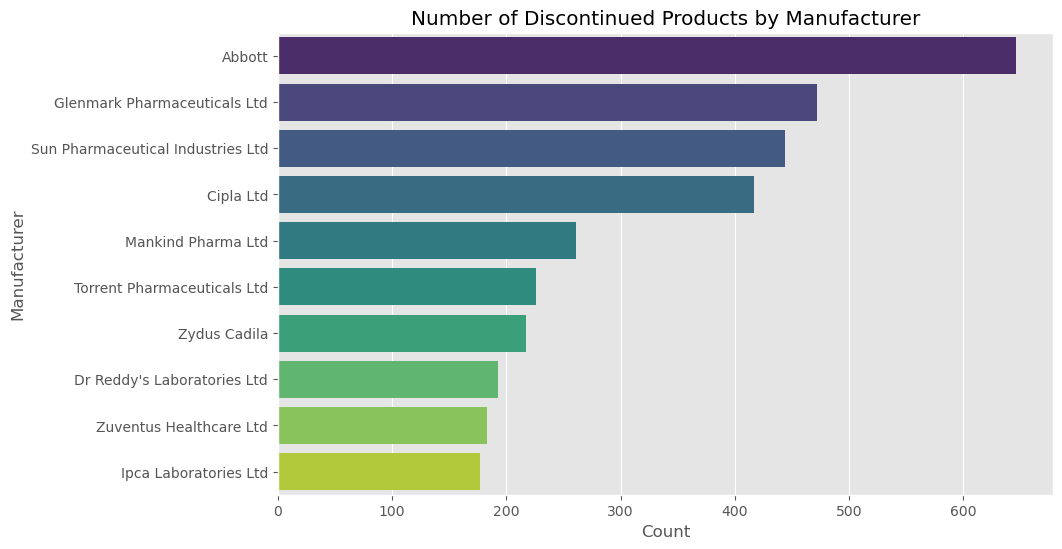

In [32]:
# Create a count plot
plt.figure(figsize=(10,6))
sns.countplot(y='manufacturer', data=df_discontinued, 
              order=df_discontinued['manufacturer'].value_counts().index[:10],
             palette='viridis')
plt.title('Number of Discontinued Products by Manufacturer')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.show()

# 💊 Summary and Conclusion

### INSIGHTS -

1. The Manufacturers' with the most products - 
    |Manufacturers | Product Counts |
    | --- | --- |
    |Sun Pharmaceutical Industries Ltd  |2986|
    |Cipla Ltd                          |2467|
    |Intas Pharmaceuticals Ltd          |2302|
    |Torrent Pharmaceuticals Ltd        |2027|
    |Alkem Laboratories Ltd             |1809|
    |Abbott                             |1777|
    |Zydus Cadila                       |1768|
    |Lupin Ltd                          |1735|
    |Micro Labs Ltd                     |1305|
    |Mankind Pharma Ltd                 |1297|

2. The average price of top manufacturers - 
   
   | Manufacturers | Average Price |
   |--- | ---|
   |Sun Pharmaceutical Industries Ltd    |2986|
   |Cipla Ltd                            |2467|
   |Intas Pharmaceuticals Ltd            |2302|
   |Torrent Pharmaceuticals Ltd          |2027|
   |Alkem Laboratories Ltd               |1809|
   |Abbott                               |1777|
   |Zydus Cadila                         |1768|
   |Lupin Ltd                            |1735|
   |Micro Labs Ltd                       |1305|
   |Mankind Pharma Ltd                   |1297|
   
3. `7905` i.e `3.11%` products have been discontinued.

4. The range pf price of top Manufacturers -  
    
    | Manufacturer | Min Price | Max Price |
    | ---| --- | --- | 
    |Abbott	                                |1.63	|53888.0|
    |Alkem Laboratories Ltd	                |2.05	|59400.0| 
    |Cipla Ltd	                            |1.25	|119500.0|
    |Intas Pharmaceuticals Ltd	            |2.12	|99000.0|
    |Lupin Ltd	                            |2.15	|55350.0|
    |Mankind Pharma Ltd	                    |3.08	|6000.0|
    |Micro Labs Ltd	                        |1.39	|4299.0|
    |Sun Pharmaceutical Industries Ltd	    |1.25	|37000.0|
    |Torrent Pharmaceuticals Ltd	        |2.93	|39990.0|
    |Zydus Cadila	                        |1.68	|99360.0|

5. The scatter plot shows a strong negative correlation between `pack size` and` price`. This means that as `pack size` increases, the `price` decreases. This is likely due to economies of scale, where larger quantities of a product can be produced at a lower cost per unit.

6. Manufacturerer wise prevalent composition of certain of specific products - 

    | Manufacturer | Product | Composition |
    | ---| --- | --- |
    |Sun Pharmaceutical Industries Ltd |Telmisartan(40 mg) |20.8% |
    |Cipla Ltd |Aceclofenac (100 mg) |16.7% |
    |Intas Pharmaceuticals Ltd|Aceclofenac (100 mg) |16.9% |
    |Torrent Pharmaceuticals Ltd|Telmisartan(40 mg) |24.3% |
    |Alkem Laboratories Ltd|Aceclofenac (100 mg) |24.55 |
    |Abbott|Cefixime (200 mg) |18.0% |
    |Zydus Cadila|Telmisartan(40 mg) |17.4% |
    |Lupin Ltd|Telmisartan(40 mg) |21.3% |
    |Micro Labs Ltd|Glimepiride (2 mg) |16.5% |
    |Mankind Pharma Ltd|Telmisartan(40 mg) |12.9% |
    
- We obsesrve `Telmisartan(40 mg)` is the most prevalent product in the top manufacturers'

7. Manufacturer wise discontinued products - 

   |Manufacturer | Count of Discontinued Products |
   | --- | --- | 
   | Abbott	|646|
   | Glenmark Pharmaceuticals Ltd	|472|
   | Sun Pharmaceutical Industries Ltd	|444|
   | Cipla Ltd	|417|
   | Mankind Pharma Ltd	|261|
   | Torrent Pharmaceuticals Ltd	|226|
   | Zydus Cadila	|217|
   | Dr Reddy's Laboratories Ltd	|193|
   | Zuventus Healthcare Ltd	|183|
   | Ipca Laboratories Ltd	|177|

# 💊 THE END